# Diabetes

The diabetes dataset from sklearn is a well-known toy dataset used for regression analysis. It consists of ten physiological variables (age, sex, body mass index, average blood pressure, and six blood serum measurements) obtained from 442 diabetes patients.

In [18]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score

In [19]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [20]:
# Create a DataFrame from the dataset
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['measure'] = diabetes.target

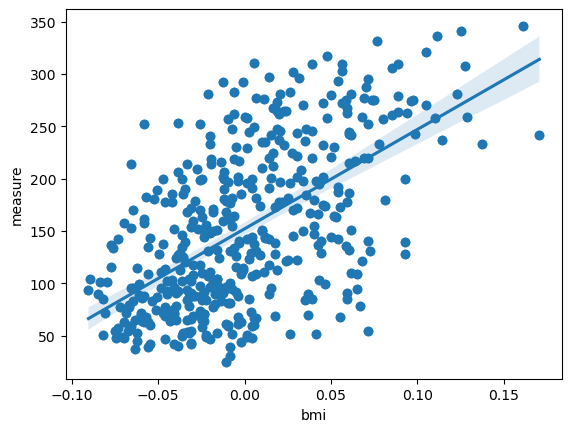

In [21]:
# Visualize the relationship between BMI and disease measure
plt.scatter(df['bmi'], df['measure'], marker='o') 
plt.xlabel('bmi')
plt.ylabel('measure')
sns.regplot(x="bmi", y="measure", data=df)
plt.show()

In [22]:
# Prepare data for linear regression
X = df[['bmi']]  # Reshaping 'bmi' into a 2D array
y = df['measure']

In [23]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [24]:
# Create and train the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [25]:
# Make predictions on the test set
y_pred = lr.predict(X_test)

In [26]:
# Print coefficients and intercept
dict_coef = dict(zip(['bmi'], lr.coef_)) 
dict_coef['Intercept'] = lr.intercept_  
print(dict_coef)

{'bmi': 1013.1735825689451, 'Intercept': 153.43509039227231}


In [27]:
# Calculate and print R2 score
r2_score_value = r2_score(y_test, y_pred)
print("R2 score", r2_score_value)

R2 score 0.23132831307953794
